![image.png](attachment:image.png)

# Introducción

Desde 2008, los huéspedes y anfitriones han utilizado Airbnb para ampliar las posibilidades de viaje y presentar una forma más única y personalizada de experimentar el mundo. Este conjunto de datos describe la actividad de listado y las métricas en la Ciudad de New York para 2019.

Este archivo de datos incluye toda la información necesaria para obtener más información sobre hosts, disponibilidad geográfica, métricas necesarias para hacer predicciones y llegar a algunas conclusiones.


# Importamos las bibliotecas necesarias

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Importamos el dataset


In [3]:
data=pd.read_csv('AB_NYC_2019.csv')


# Explorando el dataset

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.iloc[:,3:].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.shape

(48895, 16)

# Verificando valores nulos

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Limpiando los datos

### Removiendo columnas no indispensables

In [8]:
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

### transformamos de valores nulos -> 0 en columna reviews_per_month 

In [9]:
data['reviews_per_month'].fillna(0, inplace=True)

In [10]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [11]:
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Visualización de Datos

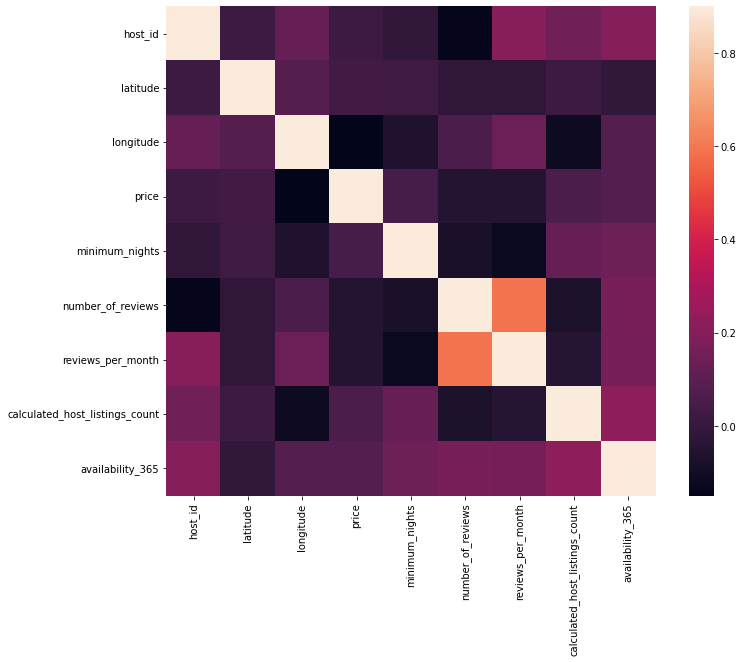

In [12]:
corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

# Agrupando y visualizando por barrios/colonias/suburbios

In [13]:
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

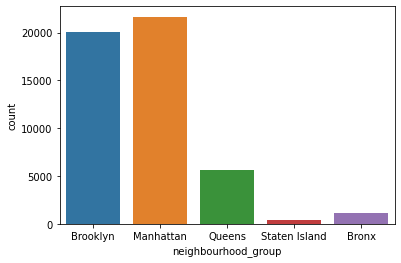

In [14]:
ax = sns.countplot(x="neighbourhood_group", data=data)

# Listado por barrio/colonia/suburbio

In [15]:
df=pd.DataFrame(data['neighbourhood'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood','neighbourhood':'count'})
df

,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


In [16]:
fig = go.Figure(go.Bar(
    x=df['neighbourhood'],y=df['count'],
    marker={'color': df['count'], 
    'colorscale': 'Viridis'},  
    text=df['count'],
    textposition = "outside",
))
fig.update_layout(xaxis_title="Neighbourhood",yaxis_title="count")
fig.show()


# Visualización de conteo por tipo de propiedad (Habitación privada vs Departamento Entero vs Habitación compartida)

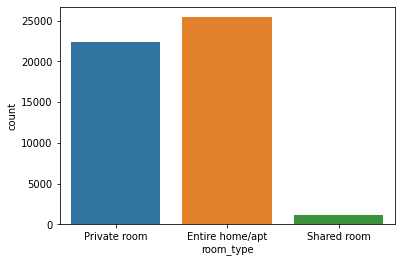

In [17]:
ax = sns.countplot(x="room_type", data=data)

# Barrio/colonia/suburbio vs disponibilidad de habitación.

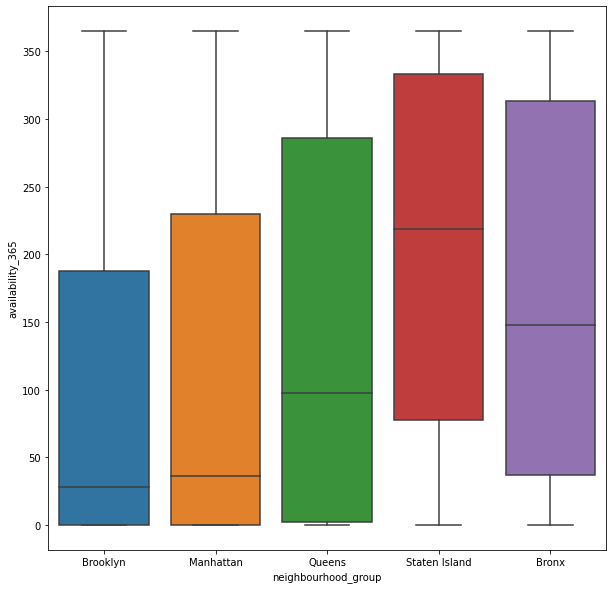

In [18]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365')

# Tipo de habitación vs disponibilidad

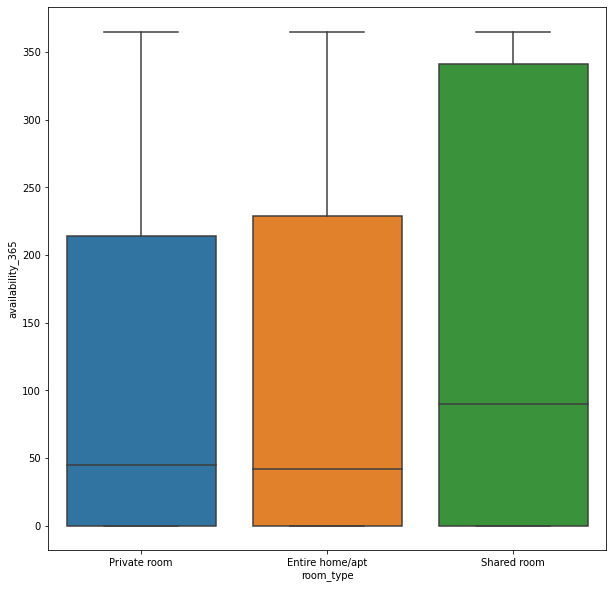

In [19]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='room_type',y='availability_365')

# Mapa de Nueva York con agrupamientos por barrio

In [20]:
fig = px.scatter(data, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()

#Ingeniería de características

In [21]:
feature_columns=['neighbourhood_group','room_type','price','minimum_nights','calculated_host_listings_count','availability_365']

In [22]:
all_data=data[feature_columns]
all_data.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


# Encoding de variables categóricas

In [23]:
all_data['room_type']=all_data['room_type'].factorize()[0]
all_data['neighbourhood_group']=all_data['neighbourhood_group'].factorize()[0]

In [24]:
all_data.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,149,1,6,365
1,1,1,225,1,2,355
2,1,0,150,3,1,365
3,0,1,89,1,1,194
4,1,1,80,10,1,0


# Partición del dataset de entrenamiento y dataset de prueba

In [25]:
y = all_data['price']
x= all_data.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)


# Modelado

## Regresión Lineal usando sklearn, r2 como métrica de éxito

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))

print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

R-squared train score: 0.050
R-squared test score: 0.043


# Regresión Ridge usando sklearn, r2 como métrica de éxito

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred=ridge.predict(x_test)

print('R-squared train score: {:.3f}'.format(ridge.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(x_test, y_test)))

R-squared train score: 0.050
R-squared test score: 0.043


# Regresión Lasso, r2 como métrica de éxito.

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10,max_iter = 10000)
lasso.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(lasso.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(lasso.score(x_test, y_test)))

R-squared score (training): 0.044
R-squared score (test): 0.036


# Regresión con árboles de decisiones, r2 como métrica de éxito

In [29]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.298
R-squared score (test): 0.253


# Regresión de Bosque Aleatorio, r2 como métrica de éxito

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
regressor.fit(x_train, y_train)

print('R-squared score (training): {:.3f}'.format(regressor.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(regressor.score(x_test, y_test)))